## **Text Mining Project - Data PreProcessing**

**Group Members:**
* NIM - Adam Ferdinand Malik Pawoko
* NIM - Muhammad Athariq Naufal
* NIM - Difa Ramadhan Raditya

#### Data Preparation

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import os

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import download

In [14]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to C:\Users\Adam
[nltk_data]     Ferdinand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Adam
[nltk_data]     Ferdinand\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [15]:
# Download NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Adam
[nltk_data]     Ferdinand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Adam
[nltk_data]     Ferdinand\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Adam
[nltk_data]     Ferdinand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
file_paths = ["Caveleather.csv", "HMNSAlpha.csv", "KahfRevered.csv", "Saffandco.csv", "TidenCO.csv"]

# Load datasets
datasets = [pd.read_csv(file) for file in file_paths]

In [4]:
# Menggabungkan Datasets
data_combined = pd.concat(datasets, ignore_index=True)  

In [5]:
# Checking for Missing Values
missing_entries = data_combined['Ulasan'].isnull().sum()
print("Number of missing entries in 'Ulasan: ", missing_entries)

Number of missing entries in 'Ulasan:  0


In [6]:
data_combined.head(5)

,Nama Pengguna,Rating,Ulasan
0,Kusnida,bintang 5,puas banget.. persis wangi punya LV 👍👍👍👍👍
1,Umar,bintang 5,Alhamdulillah bau nya enak & cukup awet. Barak...
2,Rahman,bintang 5,Repeat order Why Coz I love it
3,asep,bintang 5,barang sesuai pesanan....trims
4,Aditya,bintang 5,"nice fragrance, good packaging, seller respons..."


In [7]:
data_combined.describe()

,Nama Pengguna,Rating,Ulasan
count,2243,2243,2243
unique,1269,3,2034
top,Muhammad,bintang 5,mantap
freq,40,2211,20


In [8]:
data_combined['encoded_rating'] = data_combined['Rating'].apply(lambda x: int(x.split()[1]))

In [12]:
data_combined.count()

Nama Pengguna     2243
Rating            2243
Ulasan            2243
encoded_rating    2243
dtype: int64

#### Preprocessing

In [13]:
# Stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [14]:
# Stopwords
indonesian_stopwords = set(stopwords.words('indonesian'))
english_stopwords = set(stopwords.words('english'))
all_stopwords = indonesian_stopwords.union(english_stopwords)

In [16]:
def preprocess_text(text):
    if not isinstance(text, str):  
        return ""
    
    try:
        # Menghilangkan URL, special characters, dan angka
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        # Lowercase text
        text = text.lower()
        # Tokenize
        tokens = word_tokenize(text)
        # Menghilangkan stopwords
        tokens = [word for word in tokens if word not in all_stopwords]
        # Stem words (Bahasa Indonesia for preserving English words)
        tokens = [stemmer.stem(word) if word not in english_stopwords else word for word in tokens]
        
        return ' '.join(tokens)
    except Exception as e:
        print(f"Error processing text: {text} - Error: {e}")
        return ""


In [17]:
data_combined['cleaned_text'] = data_combined['Ulasan'].apply(preprocess_text)


In [18]:
data_combined[['Ulasan', 'cleaned_text']].head(20)


,Ulasan,cleaned_text
0,puas banget.. persis wangi punya LV 👍👍👍👍👍,puas banget persis wangi lv
1,Alhamdulillah bau nya enak & cukup awet. Barak...,alhamdulillah bau nya enak awet barakallah lii...
2,Repeat order Why Coz I love it,repeat order coz love
3,barang sesuai pesanan....trims,barang sesuai pesanantrims
4,"nice fragrance, good packaging, seller respons...",nice fragrance good packaging seller responsiv...
5,wangi nya enak .,wangi nya enak
6,"Wanginya enak , tahan lama juga , manteppp",wangi enak tahan manteppp
7,Pesanan sudah diterima dalam keadaan baik dan ...,pesan terima sesuai order paking aman aroma ba...
8,"mantap aromanya mewah ,wajar tidak tahan lama ...",mantap aroma mewah wajar tahan murah
9,bau nya ok pas ....tapi kurirnya lama....muter...,bau nya ok pas kurir lamamuter lampung wkwkwwkwk


## Word Cloud

In [19]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [20]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data_combined['cleaned_text']))


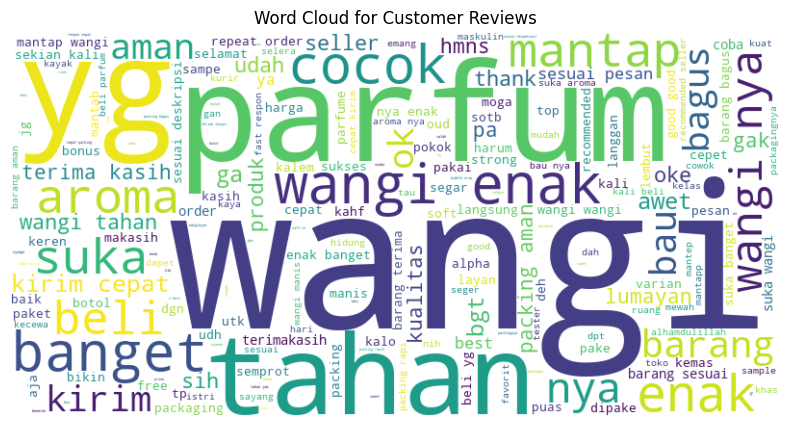

In [21]:
# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Customer Reviews")
plt.show()

In [22]:
wordcloud2 = Counter(' '.join(data_combined['cleaned_text']).split())

In [23]:
most_common_words = wordcloud2.most_common(7)
most_common_ngrams = [word for word, freq in wordcloud2.most_common(7)]
print("Kata-kata paling sering:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

Kata-kata paling sering:
wangi: 1091
enak: 379
nya: 304
tahan: 281
banget: 232
barang: 229
suka: 225


## Topic Modelling (LDA)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

In [25]:
# Vectorisasi text
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
text_matrix = vectorizer.fit_transform(data_combined['cleaned_text'])

In [26]:
# LDA (Latent Dirichlet Allocation)
# (n_components = Jumlah topic yang akan di extract)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(text_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [27]:
# Visualisasi Topic
for i, topic in enumerate(lda.components_):
    print("Topic: ", i+1)
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])


Topic:  1
['botol', 'sampe', 'nice', 'cepat', 'sih', 'best', 'banget', 'cepet', 'harga', 'kirim']
Topic:  2
['awet', 'bau', 'cocok', 'bgt', 'banget', 'nya', 'suka', 'tahan', 'enak', 'wangi']
Topic:  3
['repeat', 'suka', 'udah', 'wangi', 'parfum', 'good', 'order', 'kali', 'yg', 'beli']
Topic:  4
['seller', 'yg', 'ok', 'aroma', 'barang', 'wangi', 'beli', 'pesan', 'sesuai', 'mantap']
Topic:  5
['terima', 'sesuai', 'bagus', 'packing', 'nya', 'kirim', 'aman', 'barang', 'cepat', 'wangi']


In [28]:
# Bar Chart (Top Words)
top_words = lda.components_[0].argsort()[-10:]
word_scores = lda.components_[0][top_words]
words = [vectorizer.get_feature_names_out()[index] for index in top_words]

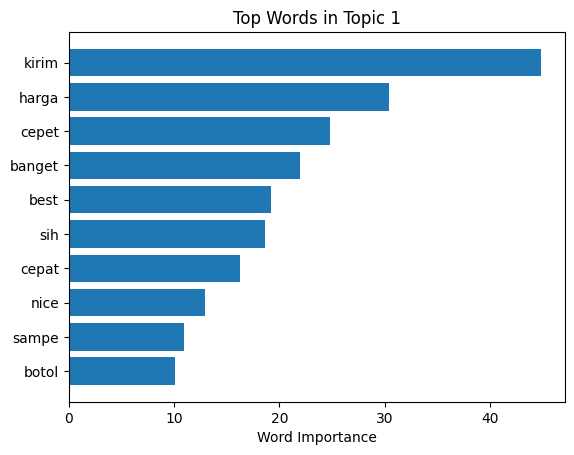

In [29]:
plt.barh(words, word_scores)
plt.xlabel("Word Importance")
plt.title("Top Words in Topic 1")
plt.show()

## N-Gram Analysis and Machine Learning

In [30]:
from sklearn.feature_extraction.text import CountVectorizer


In [31]:
# Menentukan skala n-gram (bigram dan trigram)
vectorizer = CountVectorizer(ngram_range=(2, 3), max_features=20, stop_words='english')
ngrams = vectorizer.fit_transform(data_combined['cleaned_text'])


In [32]:
# Top N-grams
top_ngrams = vectorizer.get_feature_names_out()
frequencies = ngrams.sum(axis=0).A1


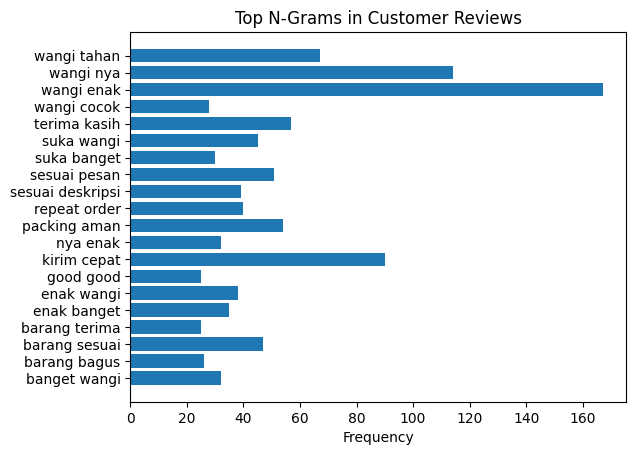

In [33]:
# Plotting Hasil
plt.barh(top_ngrams, frequencies)
plt.xlabel('Frequency')
plt.title('Top N-Grams in Customer Reviews')
plt.show()


In [34]:
freq_df = pd.DataFrame({
    'ngram': top_ngrams,
    'frequency': frequencies
}).sort_values(by='frequency', ascending=False)

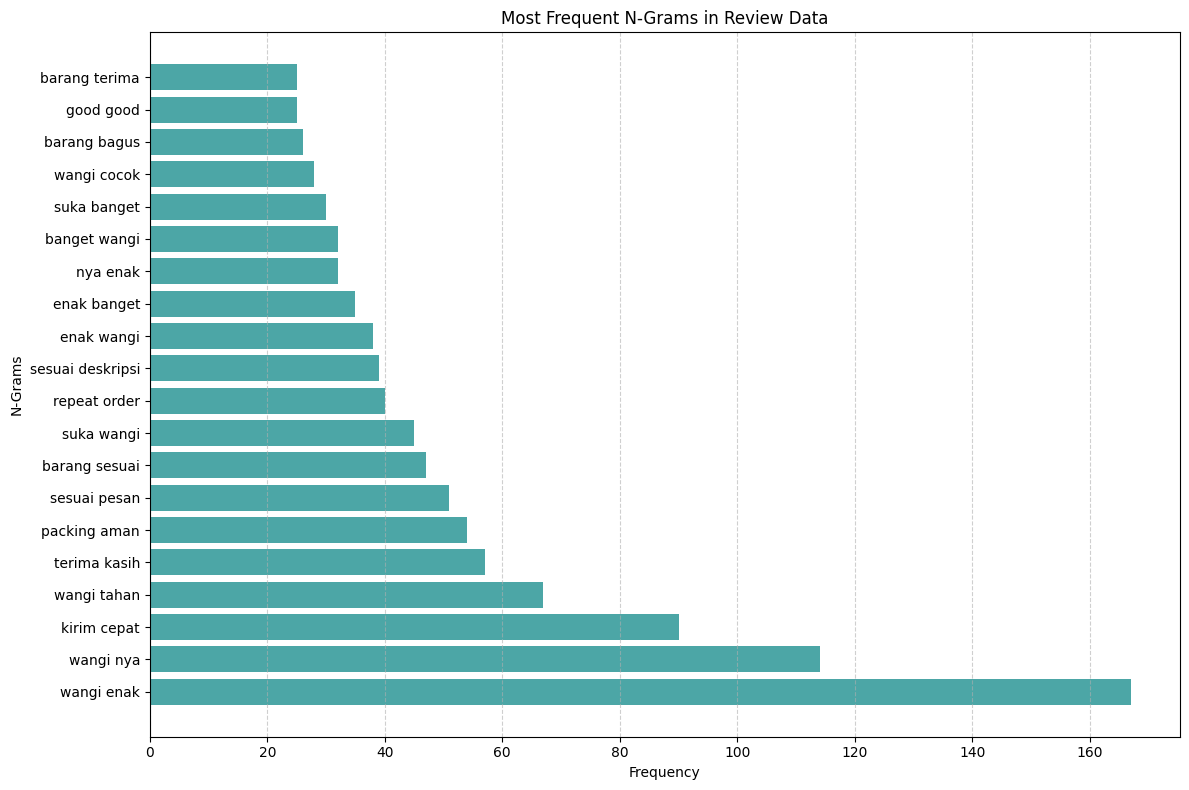

In [35]:
plt.figure(figsize=(12, 8))
plt.barh(freq_df['ngram'], freq_df['frequency'], color='teal', alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('N-Grams')
plt.title('Most Frequent N-Grams in Review Data')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [36]:
top_11_ngrams = freq_df.head(11)['ngram'].tolist()
print("Top 11 N-Grams yang paling sering muncul:", top_11_ngrams)

Top 11 N-Grams yang paling sering muncul: ['wangi enak', 'wangi nya', 'kirim cepat', 'wangi tahan', 'terima kasih', 'packing aman', 'sesuai pesan', 'barang sesuai', 'suka wangi', 'repeat order', 'sesuai deskripsi']


In [102]:
features_to_drop = ['wangi nya', 'terima kasih', 'repeat order']
features_Top = [col for col in top_11_ngrams if col not in features_to_drop]

In [103]:
X = ngrams[:, [vectorizer.vocabulary_[col] for col in features_Top]]
y = data_combined['encoded_rating']

### Linear Regression

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
LinearRegmodel = LinearRegression()
LinearRegmodel.fit(X_train, y_train)
y_pred = LinearRegmodel.predict(X_test)

In [122]:
linearmse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {linearmse}")

Mean Squared Error: 0.017712771881215603


### Ridge Regression

In [112]:
from sklearn.linear_model import Ridge

In [113]:
ridge_model = Ridge(alpha=1.0) 
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

In [114]:
print("Mean Squared Error (Ridge Regression):", mse_ridge)

Mean Squared Error (Ridge Regression): 0.01770987276291705


### XGBoost

In [115]:
from xgboost import XGBRegressor

In [116]:
xgb_model = XGBRegressor(use_label_encoder=False, eval_metric='rmse')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

c:\Program Files\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [19:55:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [117]:
print("Mean Squared Error (XGBoost):", mse_xgb)

Mean Squared Error (XGBoost): 0.01772428083139268


### Random Forest

In [118]:
from sklearn.ensemble import RandomForestRegressor

In [119]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Menggunakan 100 pohon (trees)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

In [120]:
print("Mean Squared Error (Random Forest):", mse_rf)

Mean Squared Error (Random Forest): 0.017722133276018508


## Model Comparison

In [128]:
model_names = ['Linear Regression', 'Ridge Regression', 'Xgboost', 'Random Forest']
mse_values = [linearmse, mse_ridge, mse_xgb, mse_rf]

In [129]:
comparison_df = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_values
})
print(comparison_df)

               Model       MSE
0  Linear Regression  0.017713
1   Ridge Regression  0.017710
2            Xgboost  0.017724
3      Random Forest  0.017722


In [131]:
coefficients = ridge_model.coef_
print(len(features_Top)) 
print(len(coefficients))

8
8


## Factor Evaluation

In [132]:
if len(features_Top) == len(coefficients):
    coeff_df = pd.DataFrame({
        'ngram': features_Top,
        'coefficient': coefficients
    })
    print(coeff_df.head(10))
else:
    print("Panjang feature_names dan coefficients tidak cocok!")

              ngram  coefficient
0        wangi enak     0.008357
1       kirim cepat     0.016344
2       wangi tahan    -0.051774
3      packing aman     0.012304
4      sesuai pesan     0.014030
5     barang sesuai     0.005619
6        suka wangi     0.021019
7  sesuai deskripsi     0.012810
